https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [79]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [87]:
df2 = df1[df1.location=='Rajaji Nagar'].drop(['society','balcony','availability'],axis='columns')
df2.shape

(107, 6)

**Handle NA values**

In [88]:
df2.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          1
price         0
dtype: int64

In [89]:
df3 = df2[df2.bath.notnull()]
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

**Add BHK feature**

In [90]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([4, 6, 3, 7, 2, 5, 1, 8], dtype=int64)

**Process only 2 and 3 bedroom homes**

In [92]:
df4 = df3[np.isin(df3.bhk, [2,3])]
df4.shape

(71, 7)

In [93]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [97]:
df5 = df4.copy()
df5.total_sqft = df5.total_sqft.astype(float)
df5.head()

,area_type,location,size,total_sqft,bath,price,bhk
107,Built-up Area,Rajaji Nagar,3 BHK,1640.0,3.0,229.0,3
324,Super built-up Area,Rajaji Nagar,3 BHK,2390.0,3.0,415.0,3
407,Super built-up Area,Rajaji Nagar,3 BHK,2390.0,3.0,410.0,3
965,Super built-up Area,Rajaji Nagar,3 BHK,1725.0,3.0,200.0,3
1134,Super built-up Area,Rajaji Nagar,2 BHK,1357.0,2.0,115.0,2


In [99]:
df6 = df5.copy()
df6.bhk = df5['size'].apply(lambda x: int(x.split(' ')[0]))
df6.head(2)

,area_type,location,size,total_sqft,bath,price,bhk
107,Built-up Area,Rajaji Nagar,3 BHK,1640.0,3.0,229.0,3
324,Super built-up Area,Rajaji Nagar,3 BHK,2390.0,3.0,415.0,3


<h2 style="color:purple">Clean up data using price per square feet</h2>

**Find out price per square feet**

In [100]:
df7 = df6.copy()
df7['price_per_sqft'] = df7['price']*100000/df7['total_sqft']
df7.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
107,Built-up Area,Rajaji Nagar,3 BHK,1640.0,3.0,229.0,3,13963.414634
324,Super built-up Area,Rajaji Nagar,3 BHK,2390.0,3.0,415.0,3,17364.016736
407,Super built-up Area,Rajaji Nagar,3 BHK,2390.0,3.0,410.0,3,17154.811715
965,Super built-up Area,Rajaji Nagar,3 BHK,1725.0,3.0,200.0,3,11594.202899
1134,Super built-up Area,Rajaji Nagar,2 BHK,1357.0,2.0,115.0,2,8474.576271


In [111]:
df7_stats = df7['price_per_sqft'].describe()
df7_stats

count       71.000000
mean     13072.375247
std       4230.910818
min       5833.333333
25%       9500.122820
50%      13519.222645
75%      15434.865803
max      34050.179211
Name: price_per_sqft, dtype: float64

(array([19., 50.,  1.]),
 array([    0, 10000, 20000, 30000]),
 <a list of 3 Patch objects>)

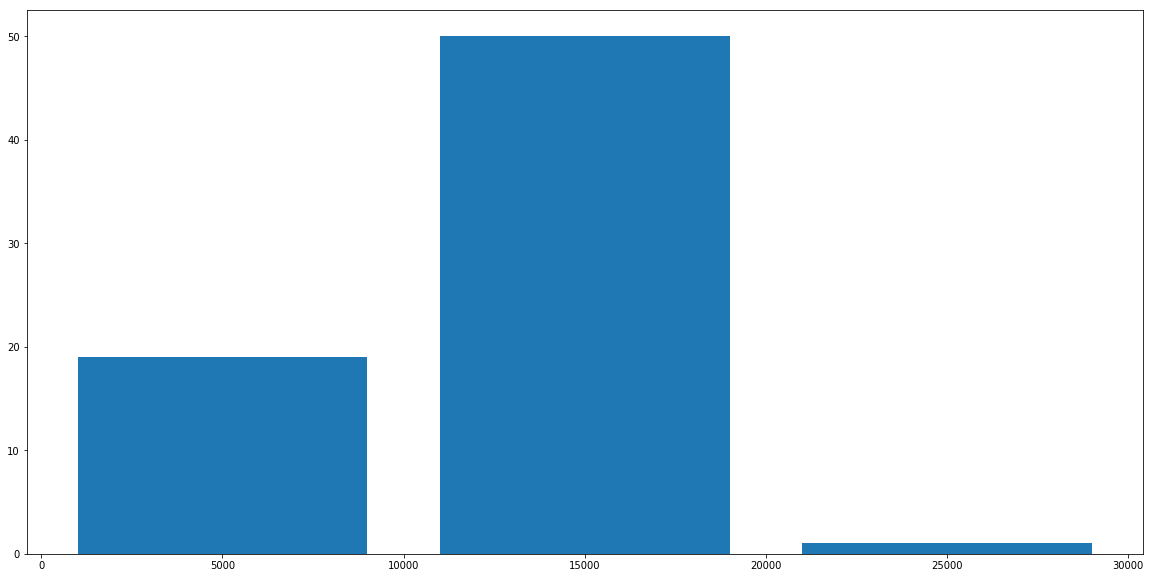

In [105]:
max_price_per_sqft = int(max(df7['price_per_sqft']))
b = range(0,max_price_per_sqft,10000)
plt.hist(df7.price_per_sqft,bins=b, rwidth=0.8)

In [114]:
df7.shape

(71, 8)

In [113]:
df7[df7.price_per_sqft<(df7_stats['mean']-df7_stats['std'])].head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
1134,Super built-up Area,Rajaji Nagar,2 BHK,1357.0,2.0,115.00,2,8474.576271
1230,Super built-up Area,Rajaji Nagar,3 BHK,1621.0,4.0,130.00,3,8019.740901
3219,Super built-up Area,Rajaji Nagar,2 BHK,1216.0,2.0,97.16,2,7990.131579
4778,Super built-up Area,Rajaji Nagar,2 BHK,1263.0,2.0,107.00,2,8471.892320
8116,Super built-up Area,Rajaji Nagar,3 BHK,1210.0,2.0,81.00,3,6694.214876


In [118]:
df8 = df7[(df7.price_per_sqft<(df7_stats['mean']+df7_stats['std'])) &
    (df7.price_per_sqft>=(df7_stats['mean']-df7_stats['std']))]
df8.shape

(57, 8)

<h2 style='color:purple'>Handle bathrooms feature</h2>

In [124]:
df8.bath.unique()

array([3., 2., 1., 4.])

(array([ 2.,  0.,  0., 15.,  0.,  0., 38.,  0.,  0.,  2.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

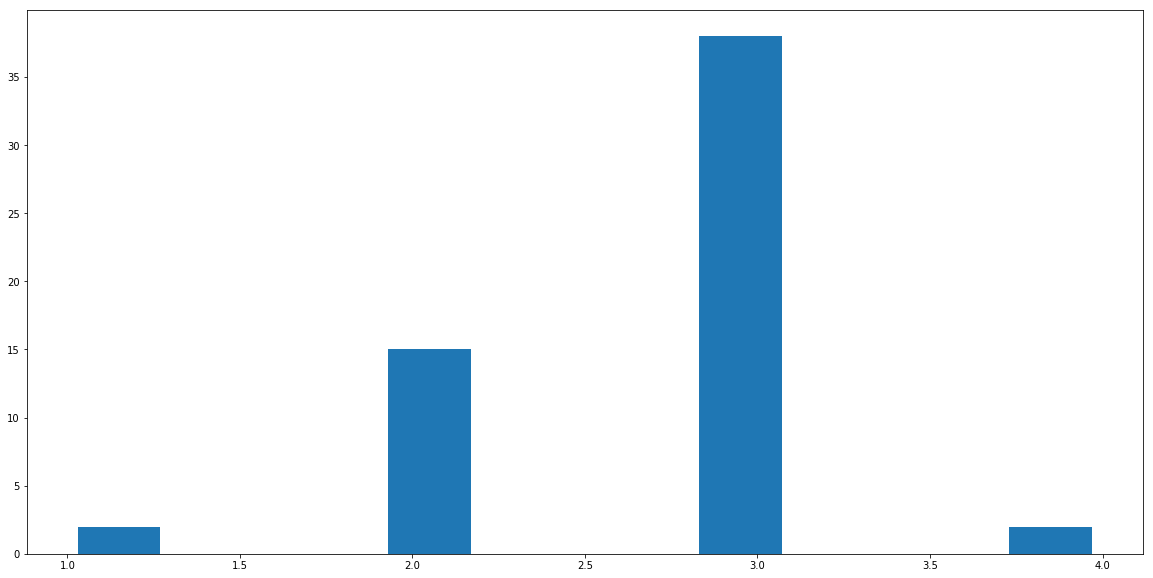

In [125]:
plt.hist(df8.bath,rwidth=0.8)

In [126]:
df8.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [148]:
df9 = df8.drop(['area_type','location','size'],axis='columns')
df9.head()

,total_sqft,bath,price,bhk,price_per_sqft
107,1640.0,3.0,229.0,3,13963.414634
407,2390.0,3.0,410.0,3,17154.811715
965,1725.0,3.0,200.0,3,11594.202899
1931,1640.0,3.0,223.0,3,13597.560976
3062,1800.0,3.0,260.0,3,14444.444444


<h2 style='color:purple'>Build a model now</h2>

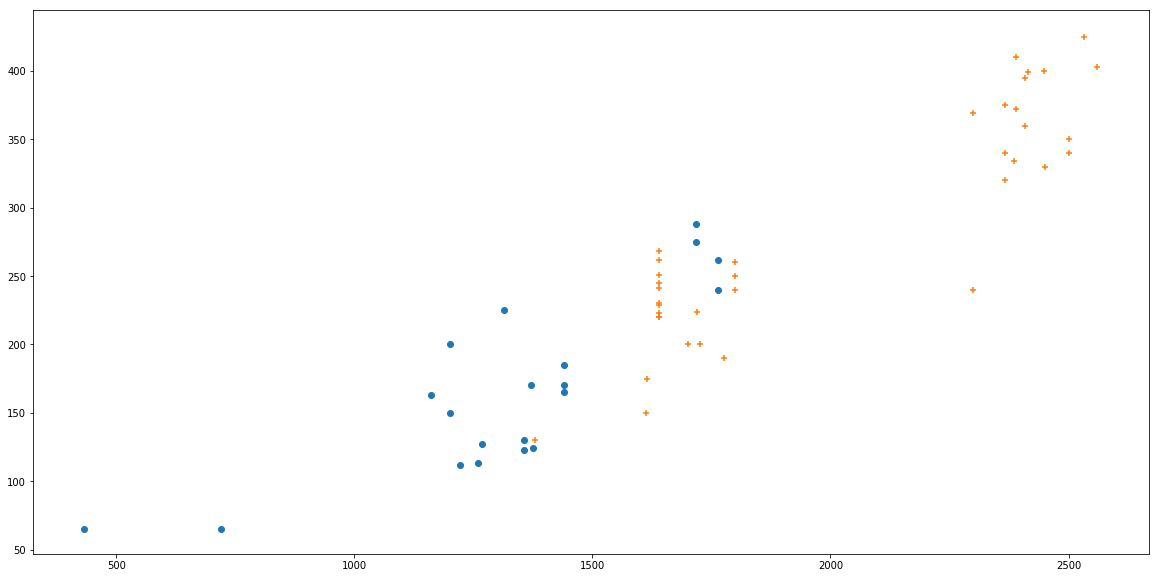

In [158]:
df2bhk = df9[df9.bhk==2]
df3bhk = df9[df9.bhk==3]
plt.scatter(df2bhk.total_sqft,df2bhk.price)
plt.scatter(df3bhk.total_sqft,df3bhk.price,marker='+')

In [151]:
df3bhk[df3bhk.price_per_sqft<df2bhk.price_per_sqft.mean()]

,total_sqft,bath,price,bhk,price_per_sqft
965,1725.0,3.0,200.0,3,11594.202899
6931,1615.0,3.0,175.0,3,10835.913313
6982,1776.0,3.0,190.0,3,10698.198198
7971,1613.0,3.0,150.0,3,9299.442033
8076,1380.0,3.0,130.0,3,9420.289855
11152,1700.0,3.0,200.0,3,11764.705882
11323,2300.0,4.0,240.0,3,10434.782609


In [153]:
exclude_i = df3bhk[df3bhk.price_per_sqft<df2bhk.price_per_sqft.mean()].index.values

In [154]:
df10 = df9.drop(exclude_i,axis='index')
df10.shape

(50, 5)

In [155]:
df2bhk10 = df10[df10.bhk==2]
df3bhk10 = df10[df10.bhk==3]

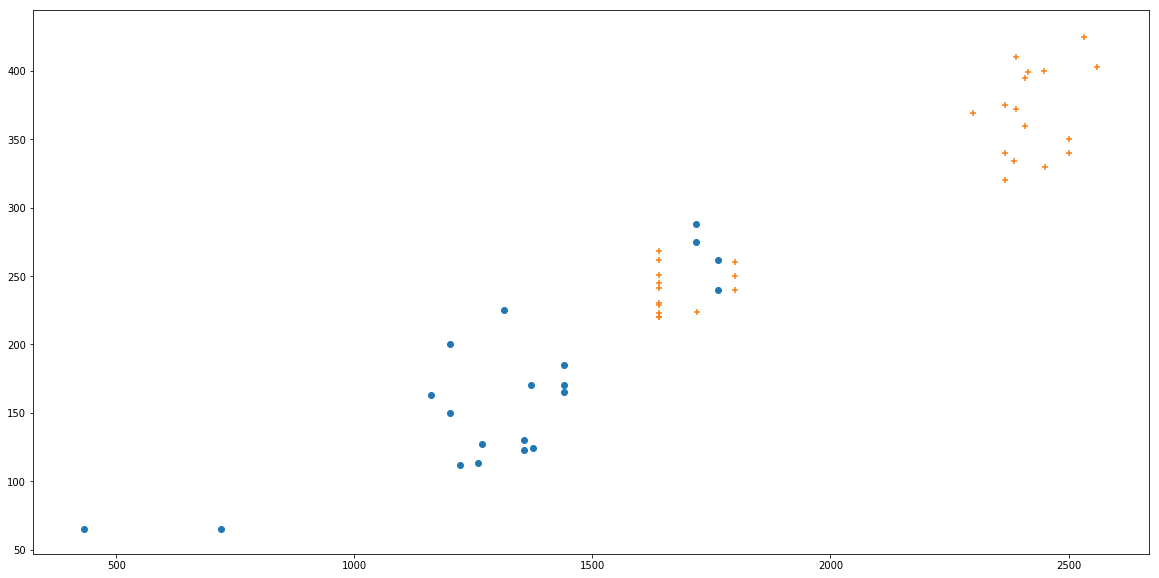

In [159]:
plt.scatter(df2bhk10.total_sqft,df2bhk10.price)
plt.scatter(df3bhk10.total_sqft,df3bhk10.price,marker='+')

In [172]:
X = df10.drop(['price','price_per_sqft'],axis='columns')
X.head()

,total_sqft,bath,bhk
107,1640.0,3.0,3
407,2390.0,3.0,3
1931,1640.0,3.0,3
3062,1800.0,3.0,3
3100,1640.0,3.0,3


In [173]:
X.shape

(50, 3)

In [174]:
y = df10.price
y.head()

107     229.0
407     410.0
1931    223.0
3062    260.0
3100    241.0
Name: price, dtype: float64

In [175]:
len(y)

50

In [176]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
model.coef_

array([ 0.16766106,  4.45686832, 11.9585943 ])

In [177]:
model.intercept_

-87.97841513749029

In [178]:
model.predict([
    [1000,2,2],
    [1000,3,3]
])

array([112.51357283, 128.92903544])